In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
mean = 5
std_dev = 3
sample_size = 10

random_sample = np.random.normal(mean, std_dev, sample_size)
random_sample_mean = np.mean(random_sample)

k_values = np.linspace(random_sample_mean - 20, random_sample_mean + 20, 100)

l_values = []
derivatives = []
for k in k_values:
    log_likelihood = -(sample_size / 2) * np.log(2 * np.pi * (std_dev ** 2)) - (1 / (2 * (std_dev ** 2))) * np.sum((random_sample - k) ** 2)
    l_values.append(log_likelihood)
    d = (sample_size / (std_dev ** 2))*(random_sample_mean - k)
    derivatives.append(d)

mle = random_sample_mean

idx_closest_to_mean = np.argmin(np.abs(k_values - mean))
intersect_x = k_values[idx_closest_to_mean]
intersect_y = derivatives[idx_closest_to_mean]

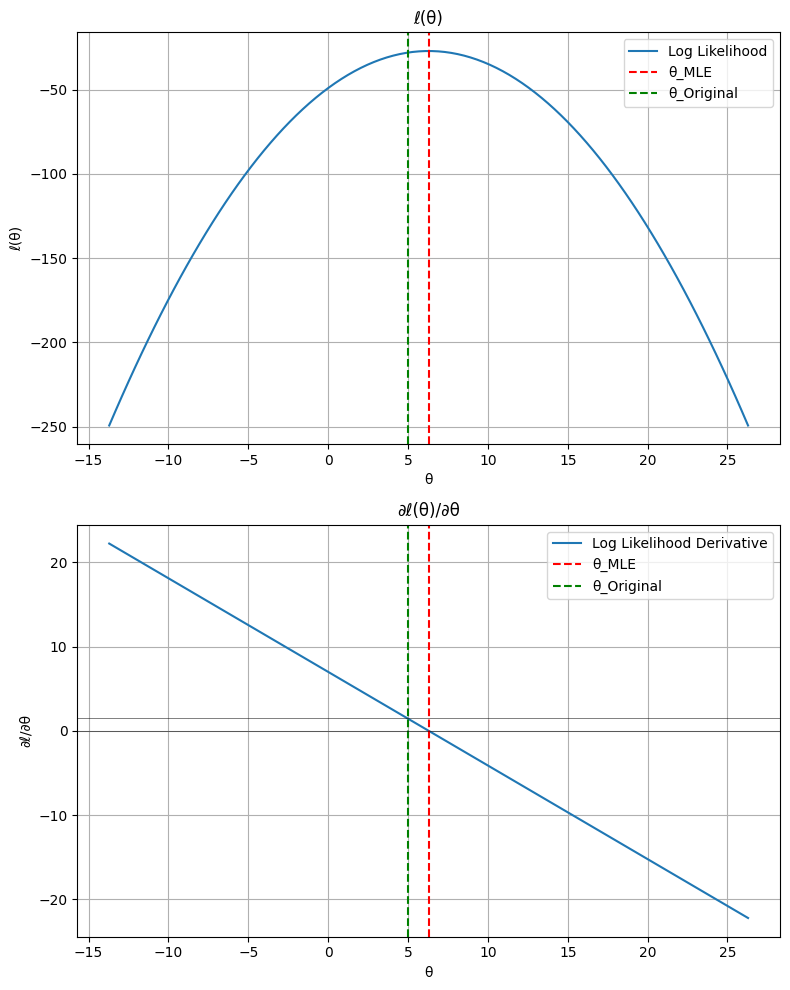

In [106]:
plt.figure(figsize=(8, 10))

# Plot Log Likelihood
plt.subplot(2, 1, 1)
plt.plot(k_values, l_values, label='Log Likelihood')
plt.xlabel('θ')
plt.ylabel('ℓ(θ)')
plt.title('ℓ(θ)')
plt.axvline(x=mle, color='red', linestyle='--', label='θ_MLE')
plt.axvline(x=mean, color='green', linestyle='--', label='θ_Original')
plt.legend()
plt.grid(True)

# Plot Derivative of Log Likelihood
plt.subplot(2, 1, 2)
plt.plot(k_values, derivatives, label='Log Likelihood Derivative')
plt.xlabel('θ')
plt.ylabel('∂ℓ/∂θ')
plt.title('∂ℓ(θ)/∂θ')
plt.axvline(x=mle, color='red', linestyle='--', label='θ_MLE')
plt.axvline(x=mean, color='green', linestyle='--', label='θ_Original')
plt.axhline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
plt.axhline(intersect_y, color='black', linewidth=0.5, linestyle='-', alpha=0.7)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

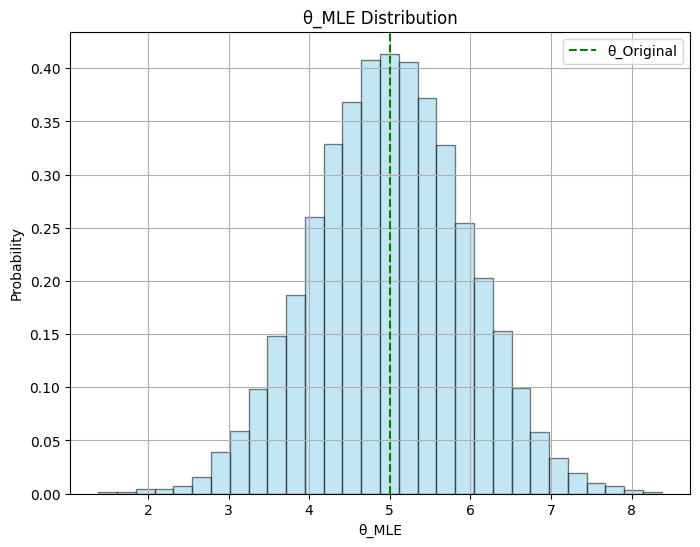

In [107]:
num_simulations = 10000
mle_values = []

for _ in range(num_simulations):
    random_sample = np.random.normal(mean, std_dev, sample_size)
    random_sample_mean = np.mean(random_sample)
    mle = random_sample_mean
    mle_values.append(mle)

plt.figure(figsize=(8, 6))
plt.hist(mle_values, bins=30, alpha=0.5, color='skyblue', edgecolor='black', density=True)
plt.axvline(x=mean, color='green', linestyle='--', label='θ_Original')
plt.xlabel('θ_MLE')
plt.ylabel('Probability')
plt.title('θ_MLE Distribution')
plt.legend()
plt.grid(True)
plt.show()